In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## define universe

pre-selected pairs for simplisity, full list of A/H pair can be found anywhere, the idea is to use only 1)high dividend and 2)liquid stock

In [4]:
# Define A/H stock pairs
pairs = {
    "1398.HK": "601398.SS",  # H share: A share
    "2318.HK": "601318.SS",
    "1288.HK": "601288.SS"
}

## get market data

fetch market data, including stock price, dividend, ex dividend date, FX price

In [7]:
# Function to fetch market data including unadjusted close price and dividends
def fetch_market_data(h_share, a_share, start_date, end_date):
    market_data = {}
    for stock in [h_share, a_share]:
        try:
            ticker = yf.Ticker(stock)
            data = ticker.history(start=start_date, end=end_date, actions=True)

            # Calculate unadjusted close prices
            data['Unadjusted Close'] = data['Close'] + data['Dividends']
            market_data[stock] = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Unadjusted Close']]
        except Exception as e:
            print(f"Error fetching data for {stock}: {e}")
            market_data[stock] = None
    return market_data

In [8]:
# Fetch FX data
def fetch_fx_data(start_date, end_date):
    fx_data = {}
    # Fetch USD to HKD and USD to CNH
    fx_data['USD-HKD'] = yf.download("HKD=X", start=start_date, end=end_date)
    fx_data['USD-CNY'] = yf.download("CNY=X", start=start_date, end=end_date) #CNH is not avaible in yfiance, use CNY as a substitute
    return fx_data

In [9]:
# Set date range for data retrieval
start_date = "2020-01-01"
end_date = "2025-01-01"

In [10]:
# Fetch data for each stock pair
market_data = {}
for h_share, a_share in pairs.items():
    market_data.update(fetch_market_data(h_share, a_share, start_date, end_date))
fx_data = fetch_fx_data(start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
market_data

{'1398.HK':                                Open      High       Low     Close     Volume  \
 Date                                                                           
 2020-01-02 00:00:00+08:00  4.073539  4.148221  4.066750  4.107485  141558831   
 2020-01-03 00:00:00+08:00  4.114274  4.141431  4.046382  4.073539  219374816   
 2020-01-06 00:00:00+08:00  4.032803  4.059960  3.992068  4.026014  183488477   
 2020-01-07 00:00:00+08:00  4.026014  4.053171  4.005647  4.012436  126310920   
 2020-01-08 00:00:00+08:00  3.924175  3.992068  3.903808  3.964911  198988794   
 ...                             ...       ...       ...       ...        ...   
 2024-12-23 00:00:00+08:00  4.734824  4.928874  4.725121  4.928874  873259229   
 2024-12-24 00:00:00+08:00  5.006494  5.006494  5.006494  5.006494          0   
 2024-12-27 00:00:00+08:00  4.996792  5.045304  4.938577  5.006494  333083324   
 2024-12-30 00:00:00+08:00  5.035602  5.064709  4.987089  5.016197  344501702   
 2024-12-31 00:00

In [12]:
fx_data

{'USD-HKD': Price         Close     High      Low     Open Volume
 Ticker        HKD=X    HKD=X    HKD=X    HKD=X  HKD=X
 Date                                                 
 2020-01-01  7.78650  7.79270  7.76690  7.78650      0
 2020-01-02  7.79250  7.79330  7.78788  7.79223      0
 2020-01-03  7.78830  7.78959  7.77584  7.78860      0
 2020-01-06  7.78150  7.78159  7.76770  7.78143      0
 2020-01-07  7.77040  7.77688  7.77020  7.77162      0
 ...             ...      ...      ...      ...    ...
 2024-12-25  7.76740  7.78720  7.76203  7.76740      0
 2024-12-26  7.76600  7.76824  7.76599  7.76600      0
 2024-12-27  7.76820  7.76820  7.76080  7.76820      0
 2024-12-30  7.76332  7.76796  7.75900  7.76332      0
 2024-12-31  7.76350  7.76820  7.76134  7.76350      0
 
 [1305 rows x 5 columns],
 'USD-CNY': Price        Close    High     Low    Open Volume
 Ticker       CNY=X   CNY=X   CNY=X   CNY=X  CNY=X
 Date                                             
 2020-01-01  6.9623  6.9623

In [13]:
# Fetch all ex-dividend dates within the given time frame
def fetch_ex_dividend_dates(stock):
    try:
        ticker = yf.Ticker(stock)
        dividends = ticker.dividends
        # Filter dividends within the specified date range
        dividends_in_range = dividends[(dividends.index >= start_date) & (dividends.index <= end_date)]
        return dividends_in_range.index.tolist()
    except Exception as e:
        print(f"Error fetching ex-dividend dates for {stock}: {e}")
        return []

In [14]:
# Fetch ex-dividend dates for all H shares
ex_div_dates = {h_share: fetch_ex_dividend_dates(h_share) for h_share in pairs.keys()}

In [15]:
ex_div_dates

{'1398.HK': [Timestamp('2020-06-22 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2021-06-28 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2022-07-04 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2023-07-06 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2024-07-08 00:00:00+0800', tz='Asia/Hong_Kong')],
 '2318.HK': [Timestamp('2020-05-08 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2020-09-16 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2021-04-22 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2021-09-28 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2022-06-01 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2022-09-20 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2023-06-14 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2023-09-11 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2024-06-07 00:00:00+0800', tz='Asia/Hong_Kong')],
 '1288.HK': [Timestamp('2020-07-02 00:00:00+0800', tz='Asia/Hong_Kong'),
  Timestamp('2021-06-09 00:00:00+08

## analyze ex-fividend dates and price performance

before put that into real strategy, a simple check if our thesis that A share outperform H share into ex-dividend date is correct

In [18]:
# Initialize a list to store performance data
performance_results = []

In [19]:
# Iterate over each H share and its corresponding ex-dividend dates
for h_share, ex_dates in ex_div_dates.items():
    # Find the corresponding A share
    a_share = pairs.get(h_share)
    
    # Check if an A share exists for the current H share
    if not a_share:
        print(f"No corresponding A share found for {h_share}.")
        continue

    # Analyze performance for each ex-dividend date
    for ex_date in ex_dates:
        # Convert ex-dividend date to datetime (already a Timestamp)
        ex_date_dt = ex_date  
        start_date_performance = ex_date_dt - timedelta(days=10)  # Look back 10 days to ensure 5 trading days

        # Get price data for the specified date range for A and H shares
        a_prices = market_data[a_share].loc[start_date_performance:ex_date_dt]['Close']
        h_prices = market_data[h_share].loc[start_date_performance:ex_date_dt]['Close']
        
        # Use last available price if there are missing values for A share
        if len(a_prices) < 5:
            a_prices = a_prices.ffill()  # Forward fill to use the last available price
            a_prices = a_prices.dropna()  # Drop any remaining NaN values

        # Ensure we have 5 prices for A share after filling
        if len(a_prices) < 5:
            print(f"Not enough data for {a_share} leading up to {ex_date_dt}.")
            continue
        
        # Select the last 5 available prices for A share
        a_prices = a_prices.tail(5)
        
        # Use only available prices for H share
        if len(h_prices) < 5:
            h_prices = h_prices.ffill()  # Forward fill for H share
            h_prices = h_prices.dropna()  # Drop any remaining NaN values

        # Ensure we have 5 prices for H share
        if len(h_prices) < 5:
            print(f"Not enough data for {h_share} leading up to {ex_date_dt}.")
            continue
        
        # Select the last 5 available prices for H share
        h_prices = h_prices.tail(5)
        
        # Calculate percentage change for A and H shares
        a_pct_change = (a_prices.iloc[-1] - a_prices.iloc[0]) / a_prices.iloc[0] * 100
        h_pct_change = (h_prices.iloc[-1] - h_prices.iloc[0]) / h_prices.iloc[0] * 100
        
        # Calculate the difference in performance
        difference = a_pct_change - h_pct_change
        
        # Store the results in the performance_results list
        performance_results.append({
            'pair': h_share,
            'ex_date': ex_date,
            'A_performance': a_pct_change,
            'H_performance': h_pct_change,
            'difference': difference
        })

# Convert the results to a DataFrame
performance_df = pd.DataFrame(performance_results)

# Print the performance DataFrame
print(performance_df)

       pair                   ex_date  A_performance  H_performance  \
0   1398.HK 2020-06-22 00:00:00+08:00      -2.641520       0.498417   
1   1398.HK 2021-06-28 00:00:00+08:00       0.387590       0.184483   
2   1398.HK 2022-07-04 00:00:00+08:00       0.845660       2.742637   
3   1398.HK 2023-07-06 00:00:00+08:00      -1.037342      -4.815312   
4   1398.HK 2024-07-08 00:00:00+08:00      -1.340026      -1.829954   
5   2318.HK 2020-05-08 00:00:00+08:00       0.390275       2.614398   
6   2318.HK 2020-09-16 00:00:00+08:00       3.756993       2.782121   
7   2318.HK 2021-04-22 00:00:00+08:00       0.096203      -2.492031   
8   2318.HK 2021-09-28 00:00:00+08:00       3.097532       6.805090   
9   2318.HK 2022-06-01 00:00:00+08:00       2.363835       6.945913   
10  2318.HK 2022-09-20 00:00:00+08:00      -3.157905      -1.710643   
11  2318.HK 2023-06-14 00:00:00+08:00      -0.246616      -0.800456   
12  2318.HK 2023-09-11 00:00:00+08:00       0.318726      -3.749812   
13  23

In [20]:
# Calculate the average and sum of the differences
average_difference = performance_df['difference'].mean()
sum_difference = performance_df['difference'].sum()

# Print the average and sum of differences
print(f"\nAverage Difference: {average_difference:.2f}%")
print(f"Sum of Differences: {sum_difference:.2f}%")


Average Difference: 0.88%
Sum of Differences: 16.78%


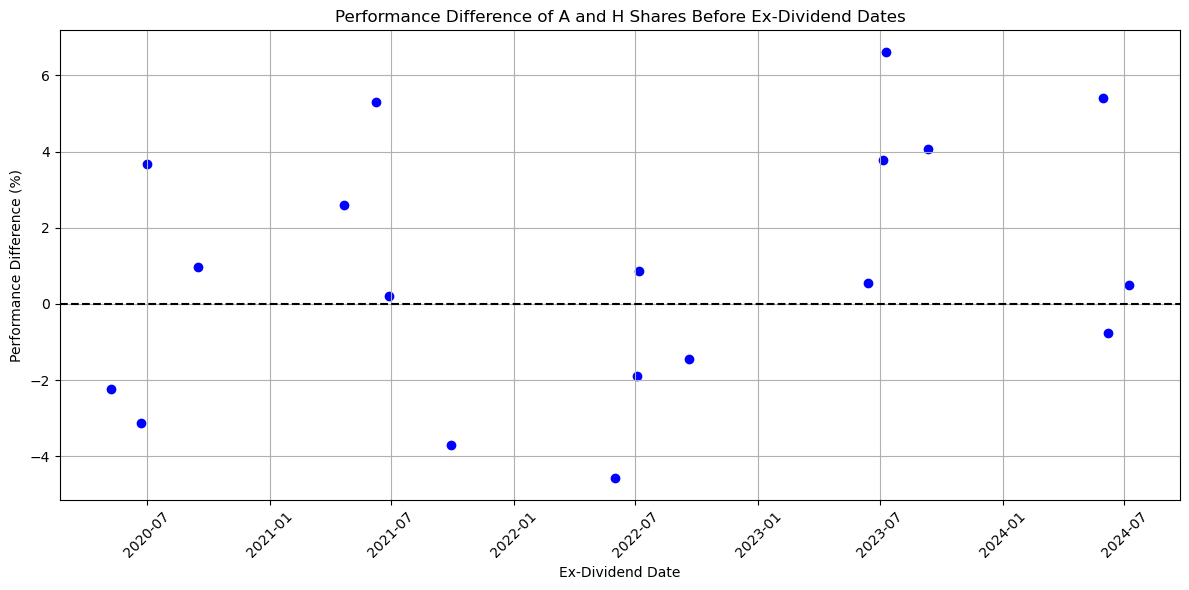

In [21]:
# Ensure the 'difference' column is numeric
performance_df['difference'] = pd.to_numeric(performance_df['difference'], errors='coerce')

# Plotting the difference
plt.figure(figsize=(12, 6))

# Plot the difference as a scatter plot
plt.scatter(performance_df['ex_date'], performance_df['difference'], color='blue', marker='o')

# Add titles and labels
plt.title('Performance Difference of A and H Shares Before Ex-Dividend Dates')
plt.xlabel('Ex-Dividend Date')
plt.ylabel('Performance Difference (%)')
plt.axhline(0, color='black', linestyle='--')  # Horizontal line at y=0
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

## trading strategy and backtest

now that i have pairs, market_data, fx_data, and ex_div_dates
I want to build a strategy to buy $1mn USD worth of A share, and sell $1mn USD worth of H share, each round to 1 share
the entry of the trade will be 5 trading day (ex weekend) before the ex-div date, using close price
the exit of the trade will be 1 trading day (ex weekend) adter the ex-div date, using close price
the trade will be only execute when both market open, meaning, when both A share and H share have market data on that date
if either one market data is missing, the trade will not be executed

In [24]:
# Initialize an empty list to store results
results = []

In [25]:
# Loop through each pair
for h_share, a_share in pairs.items():
    ex_dates = ex_div_dates[h_share]  # Get ex-dividend dates for the H share
    
    for ex_date in ex_dates:
        # Define entry and exit dates
        entry_date = ex_date - pd.DateOffset(days=5)
        exit_date = ex_date + pd.DateOffset(days=1)

        # Get market data for both shares around the entry and exit dates
        a_data = market_data[a_share]
        h_data = market_data[h_share]

        # Filter market data for the relevant dates
        a_entry = a_data[(a_data.index == entry_date)]
        h_entry = h_data[(h_data.index == entry_date)]
        a_exit = a_data[(a_data.index == exit_date)]
        h_exit = h_data[(h_data.index == exit_date)]

        # Check if we have data for both shares
        if not a_entry.empty and not h_entry.empty and not a_exit.empty and not h_exit.empty:
            # Get close prices
            entry_price_a = a_entry['Close'].values[0]
            entry_price_h = h_entry['Close'].values[0]
            exit_price_a = a_exit['Close'].values[0]
            exit_price_h = h_exit['Close'].values[0]

            # Calculate number of shares to trade
            amount_usd = 1_000_000
            shares_a = amount_usd *6.7 / entry_price_a
            shares_h = amount_usd * 7.8 / entry_price_h

            # Calculate profit/loss
            profit_a = (exit_price_a - entry_price_a) * shares_a
            profit_h = (exit_price_h - entry_price_h) * shares_h
            total_profit = profit_a - profit_h
            
            # Store results
            results.append({
                'pair': h_share,
                'entry_date': entry_date,
                'exit_date': exit_date,
                'entry_price_a': entry_price_a,
                'entry_price_h': entry_price_h,
                'exit_price_a': exit_price_a,
                'exit_price_h': exit_price_h,
                'total_profit': total_profit
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

In [26]:
results_df

,pair,entry_date,exit_date,entry_price_a,entry_price_h,exit_price_a,exit_price_h,total_profit
0,1398.HK,2020-06-17 00:00:00+08:00,2020-06-23 00:00:00+08:00,3.882890,3.476087,3.794307,3.507789,-223987.922042
1,1398.HK,2021-06-23 00:00:00+08:00,2021-06-29 00:00:00+08:00,3.994248,3.608422,4.017561,3.539258,188612.672048
2,1398.HK,2022-06-29 00:00:00+08:00,2022-07-05 00:00:00+08:00,3.906560,3.585322,3.931129,3.588599,35009.321291
3,1398.HK,2024-07-03 00:00:00+08:00,2024-07-09 00:00:00+08:00,5.479974,4.261479,5.526494,4.181781,202752.315386
4,2318.HK,2020-09-11 00:00:00+08:00,2020-09-17 00:00:00+08:00,62.997013,66.172249,65.109344,67.350052,85822.842977
5,2318.HK,2021-09-23 00:00:00+08:00,2021-09-29 00:00:00+08:00,40.491066,44.586388,41.305584,46.701256,-235200.607804
6,2318.HK,2022-05-27 00:00:00+08:00,2022-06-02 00:00:00+08:00,37.155052,41.436134,37.556221,41.733841,16300.195219
7,2318.HK,2022-09-15 00:00:00+08:00,2022-09-21 00:00:00+08:00,39.754547,41.334263,38.044106,38.877640,175310.252712
8,2318.HK,2023-06-09 00:00:00+08:00,2023-06-15 00:00:00+08:00,44.619755,48.608425,45.024685,49.066341,-12676.617869
9,2318.HK,2023-09-06 00:00:00+08:00,2023-09-12 00:00:00+08:00,47.451668,46.061321,46.447399,44.995342,38713.307070


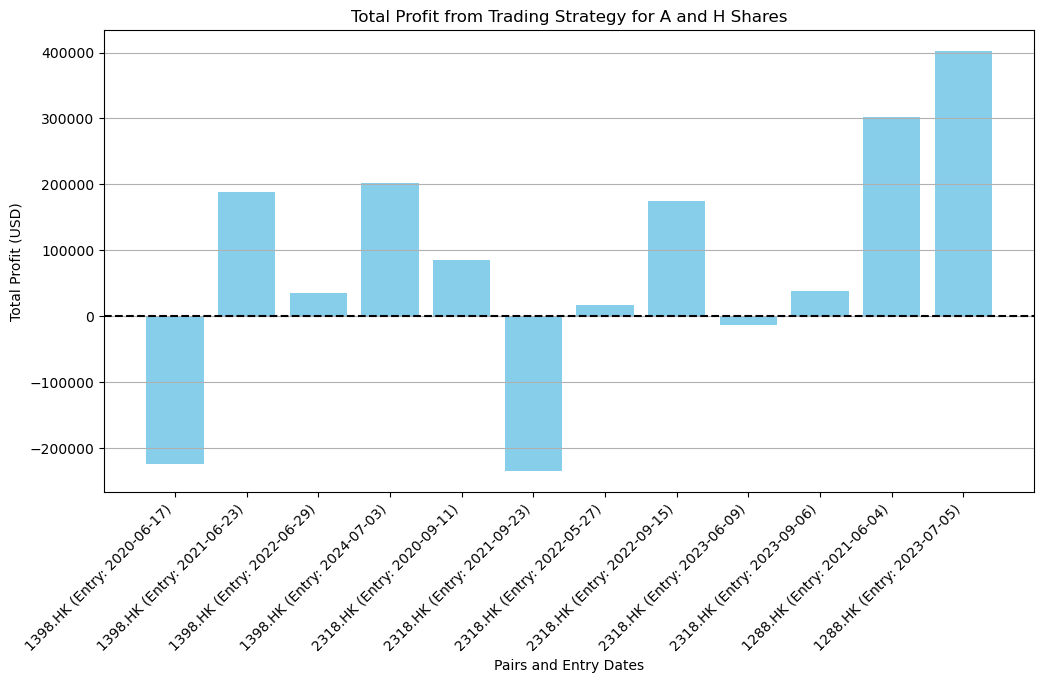

In [27]:
# Plotting the total profit for each trade
plt.figure(figsize=(12, 6))
plt.bar(results_df['pair'] + ' (Entry: ' + results_df['entry_date'].dt.strftime('%Y-%m-%d') + ')', results_df['total_profit'], color='skyblue')

plt.title('Total Profit from Trading Strategy for A and H Shares')
plt.xlabel('Pairs and Entry Dates')
plt.ylabel('Total Profit (USD)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linestyle='--')  # Horizontal line at y=0
plt.grid(axis='y')

plt.show()

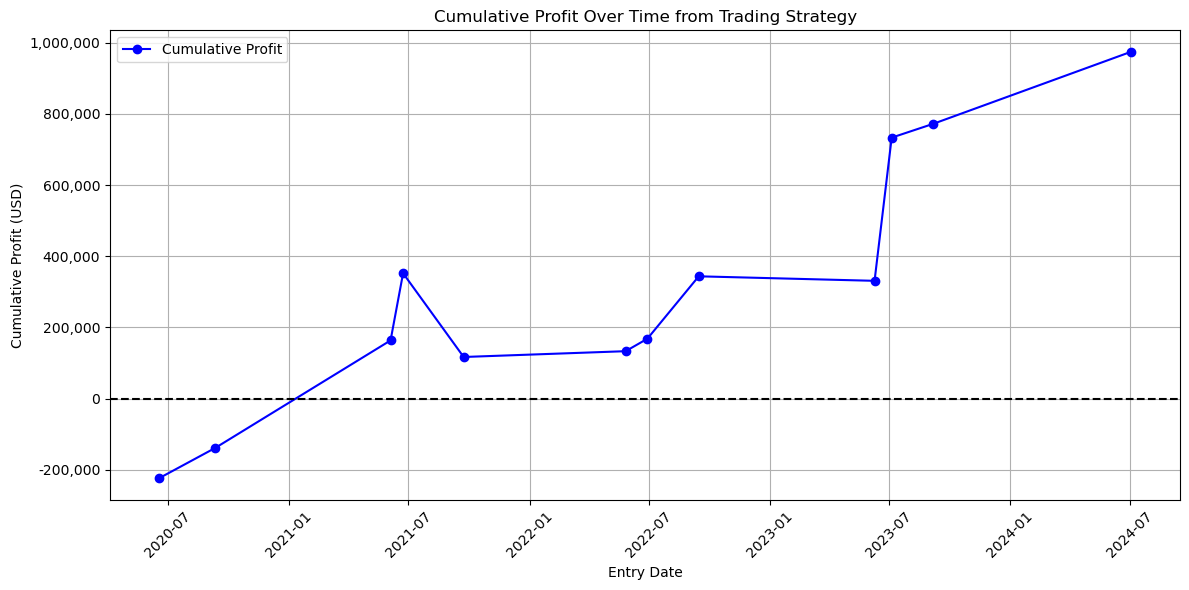

In [28]:
# Convert entry_date to datetime if not already
results_df['entry_date'] = pd.to_datetime(results_df['entry_date'])

# Group by entry_date and sum profits (if multiple trades on the same day)
cumulative_profit = results_df.groupby('entry_date')['total_profit'].sum().cumsum()

# Plotting the cumulative profit over time
plt.figure(figsize=(12, 6))
plt.plot(cumulative_profit.index, cumulative_profit.values, marker='o', color='blue', label='Cumulative Profit')

# Adding titles and labels
plt.title('Cumulative Profit Over Time from Trading Strategy')
plt.xlabel('Entry Date')
plt.ylabel('Cumulative Profit (USD)')
plt.axhline(0, color='black', linestyle='--')  # Horizontal line at y=0
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format with commas

# Show the plot
plt.tight_layout()
plt.show()

## add cost of trading and fx change into consideration

now add real fx and trading cost into consideration,
cost can be found on this website
https://www.hkex.com.hk/Services/Rules-and-Forms-and-Fees/Fees/Securities-(Hong-Kong)/Trading/Transaction?sc_lang=en

In [29]:
# Initialize an empty list to store results
results_2 = []


In [30]:
trading_costs = {
    "A_share": 0.0005441, 
    "H_share": 0.011785  
}

#market charge can be found on this webside https://www.hkex.com.hk/Services/Rules-and-Forms-and-Fees/Fees/Securities-(Hong-Kong)/Trading/Transaction?sc_lang=en

In [31]:
# Loop through each share pair
for h_share, a_share in pairs.items():
    for ex_date in ex_div_dates[h_share]:  # Access the list of ex-dividend dates
        # Define entry and exit dates
        entry_date = ex_date - pd.DateOffset(days=5)
        exit_date = ex_date + pd.DateOffset(days=1)

        # Get market data for both shares around the entry and exit dates
        a_market_data = market_data[a_share]
        h_market_data = market_data[h_share]

        # Filter market data for the relevant dates
        a_entry_data = a_market_data.loc[a_market_data.index == entry_date]
        h_entry_data = h_market_data.loc[h_market_data.index == entry_date]
        a_exit_data = a_market_data.loc[a_market_data.index == exit_date]
        h_exit_data = h_market_data.loc[h_market_data.index == exit_date]

        # Normalize entry_date for FX rate lookup (extract date part)
        entry_date_only = entry_date.date()

        # Get FX rates for USD-HKD and USD-CNY on the relevant dates
        fx_rate_hkd = fx_data['USD-HKD'].loc[fx_data['USD-HKD'].index.date == entry_date_only, 'Close'].values[0] if entry_date_only in fx_data['USD-HKD'].index.date else None
        fx_rate_cny = fx_data['USD-CNY'].loc[fx_data['USD-CNY'].index.date == entry_date_only, 'Close'].values[0] if entry_date_only in fx_data['USD-CNY'].index.date else None

        # Check if we have data for both shares and FX rates
        if (not a_entry_data.empty and not h_entry_data.empty and 
            not a_exit_data.empty and not h_exit_data.empty and
            fx_rate_hkd is not None and fx_rate_cny is not None):
            # Get close prices
            entry_price_a = a_entry_data['Close'].values[0]
            entry_price_h = h_entry_data['Close'].values[0]
            exit_price_a = a_exit_data['Close'].values[0]
            exit_price_h = h_exit_data['Close'].values[0]

            # Calculate number of shares to trade
            shares_a = (1_000_000 * fx_rate_cny) / entry_price_a  # A shares in CNY
            shares_h = (1_000_000 * fx_rate_hkd) / entry_price_h  # H shares in HKD

            # Calculate trading costs
            trading_cost_a = entry_price_a * shares_a * trading_costs['A_share']
            trading_cost_h = entry_price_h * shares_h * trading_costs['H_share']

            # Calculate profit/loss after costs and FX conversion
            profit_a = (exit_price_a - entry_price_a) * shares_a - trading_cost_a
            profit_h = (exit_price_h - entry_price_h) * shares_h - trading_cost_h
            
            # Extract the scalar value from the ndarray
            profit_a_scalar = profit_a.item()  # Use .item() to convert to a Python scalar
            profit_h_scalar = profit_h.item()  # Use .item() to convert to a Python scalar

            # Calculate total profit
            total_profit = profit_a_scalar - profit_h_scalar  # Now this will be a scalar
            
            # Store trade results
            results_2.append({
                'pair': h_share,
                'entry_date': entry_date,
                'exit_date': exit_date,
                'entry_price_a': entry_price_a,
                'entry_price_h': entry_price_h,
                'exit_price_a': exit_price_a,
                'exit_price_h': exit_price_h,
                'total_profit': total_profit
            })


# Convert results to DataFrame
results_2_df = pd.DataFrame(results_2)

In [32]:
results_2_df

,pair,entry_date,exit_date,entry_price_a,entry_price_h,exit_price_a,exit_price_h,total_profit
0,1398.HK,2020-06-17 00:00:00+08:00,2020-06-23 00:00:00+08:00,3.882890,3.476087,3.794307,3.507789,-144860.273175
1,1398.HK,2021-06-23 00:00:00+08:00,2021-06-29 00:00:00+08:00,3.994248,3.608422,4.017561,3.539258,274678.121621
2,1398.HK,2022-06-29 00:00:00+08:00,2022-07-05 00:00:00+08:00,3.906560,3.585322,3.931129,3.588599,123826.682688
3,1398.HK,2024-07-03 00:00:00+08:00,2024-07-09 00:00:00+08:00,5.479974,4.261479,5.526494,4.181781,295965.222800
4,2318.HK,2020-09-11 00:00:00+08:00,2020-09-17 00:00:00+08:00,62.997013,66.172249,65.109344,67.350052,178796.985927
5,2318.HK,2021-09-23 00:00:00+08:00,2021-09-29 00:00:00+08:00,40.491066,44.586388,41.305584,46.701256,-151091.345867
6,2318.HK,2022-05-27 00:00:00+08:00,2022-06-02 00:00:00+08:00,37.155052,41.436134,37.556221,41.733841,105191.625131
7,2318.HK,2022-09-15 00:00:00+08:00,2022-09-21 00:00:00+08:00,39.754547,41.334263,38.044106,38.877640,255688.837987
8,2318.HK,2023-06-09 00:00:00+08:00,2023-06-15 00:00:00+08:00,44.619755,48.608425,45.024685,49.066341,79195.836832
9,2318.HK,2023-09-06 00:00:00+08:00,2023-09-12 00:00:00+08:00,47.451668,46.061321,46.447399,44.995342,115345.135321


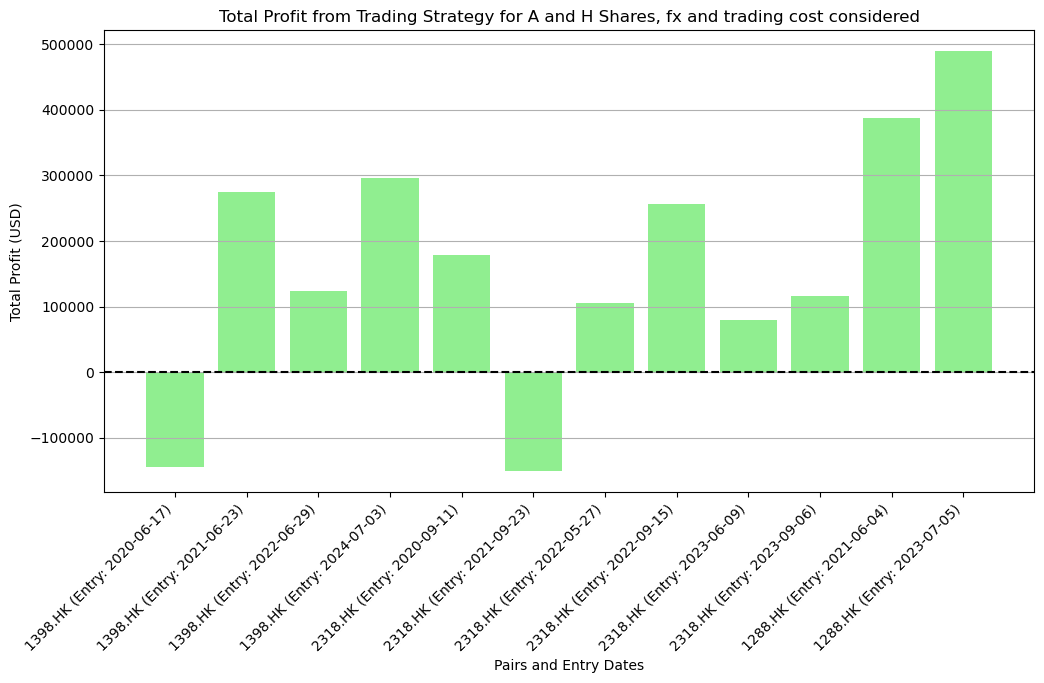

In [33]:

# Plotting the total profit for each trade
plt.figure(figsize=(12, 6))
plt.bar(results_2_df['pair'] + ' (Entry: ' + results_2_df['entry_date'].dt.strftime('%Y-%m-%d') + ')', results_2_df['total_profit'], color='lightgreen')

plt.title('Total Profit from Trading Strategy for A and H Shares, fx and trading cost considered')
plt.xlabel('Pairs and Entry Dates')
plt.ylabel('Total Profit (USD)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linestyle='--')  # Horizontal line at y=0
plt.grid(axis='y')

plt.show()

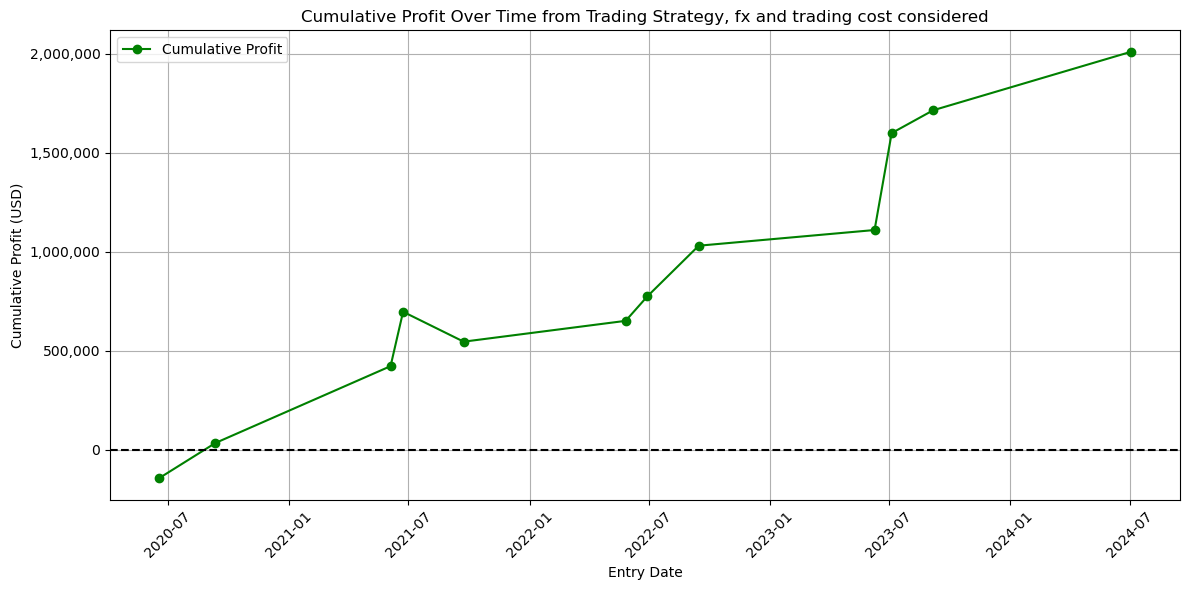

In [34]:
# Convert entry_date to datetime if not already
results_2_df['entry_date'] = pd.to_datetime(results_2_df['entry_date'])

# Group by entry_date and sum profits (if multiple trades on the same day)
cumulative_profit_2 = results_2_df.groupby('entry_date')['total_profit'].sum().cumsum()

# Plotting the cumulative profit over time
plt.figure(figsize=(12, 6))
plt.plot(cumulative_profit_2.index, cumulative_profit_2.values, marker='o', color='green', label='Cumulative Profit')

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format with commas

# Adding titles and labels
plt.title('Cumulative Profit Over Time from Trading Strategy, fx and trading cost considered')
plt.xlabel('Entry Date')
plt.ylabel('Cumulative Profit (USD)')
plt.axhline(0, color='black', linestyle='--')  # Horizontal line at y=0
plt.xticks(rotation=45)
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()